In [1]:
import torch
from diffusers import StableDiffusionPipeline
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
ldm_stable = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", local_files_only=True).to(device)
tokenizer = ldm_stable.tokenizer

In [20]:
import control
import importlib
importlib.reload(control)
from control import *

debug:  1 torch.Size([1, 77, 768]) torch.Size([1, 77, 768])


/home/wy4/prompt-to-prompt/ptp_utils.py:91: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  latent = torch.randn(
/home/wy4/prompt-to-prompt/ptp_utils.py:94: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  )


  0%|          | 0/51 [00:00<?, ?it/s]

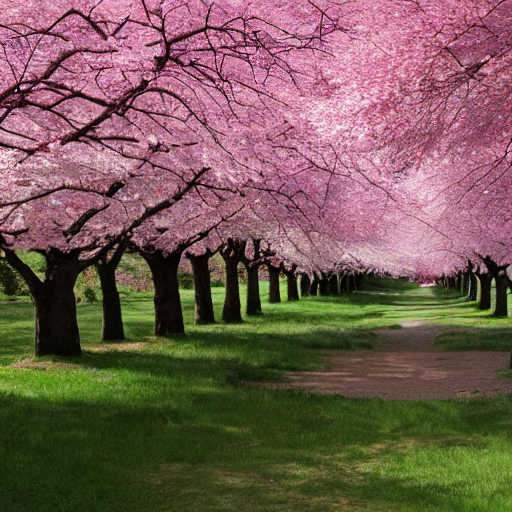

view up_cross_0


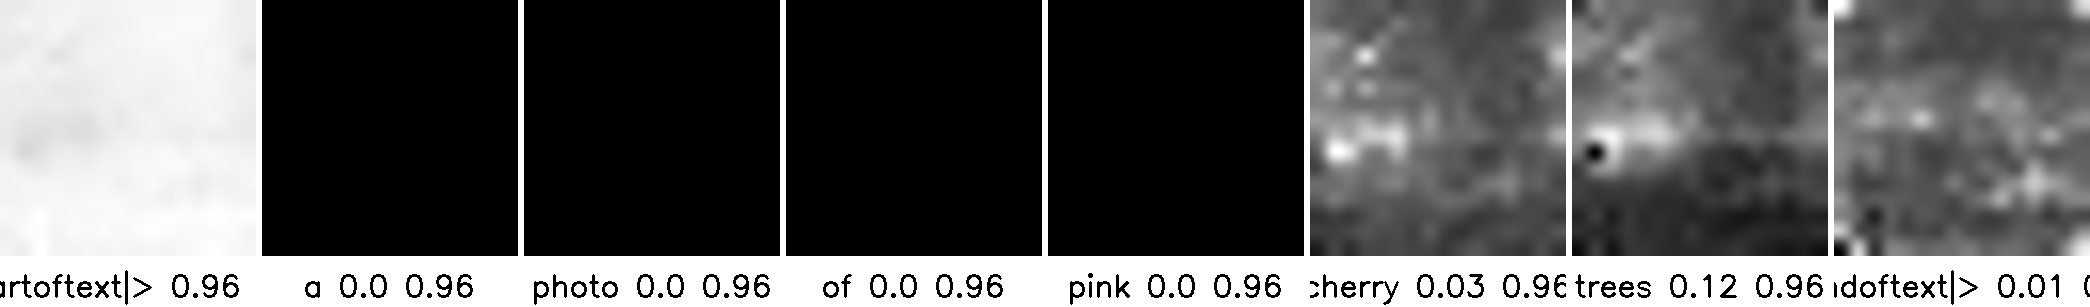

view up_cross_1


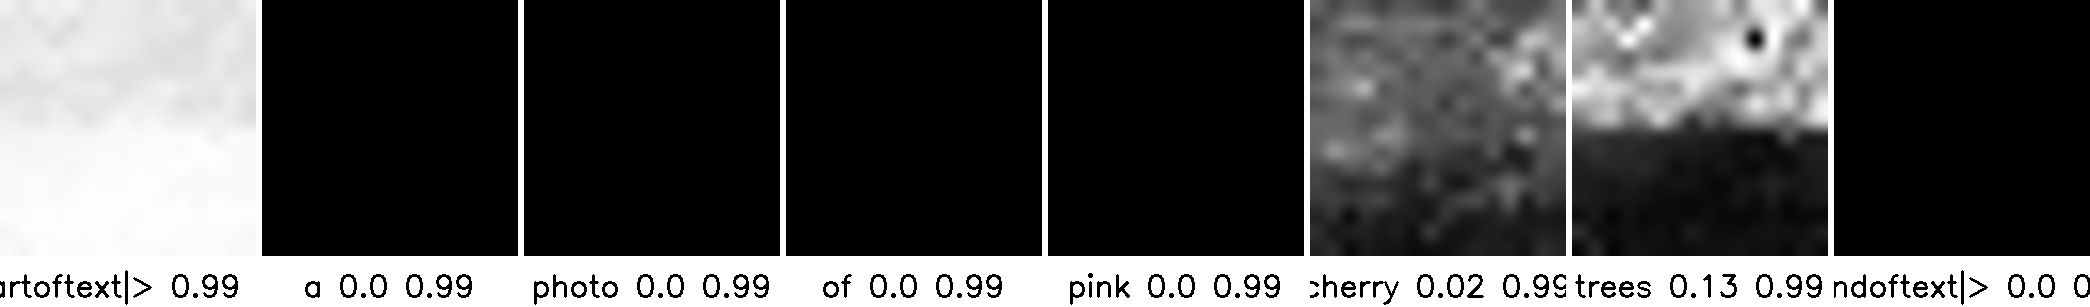

view up_cross_2


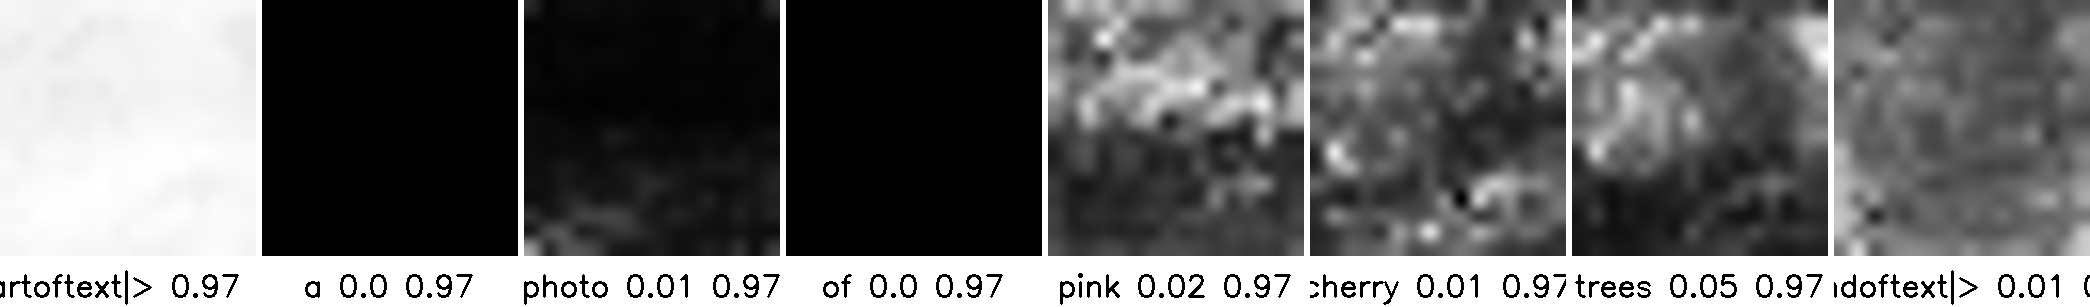

view down_cross_2


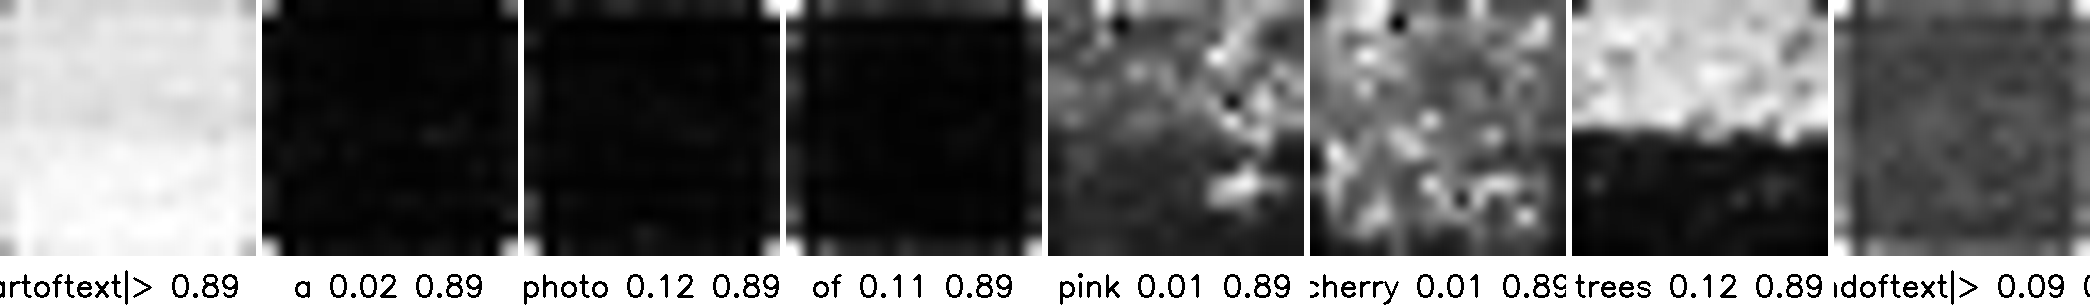

view down_cross_3


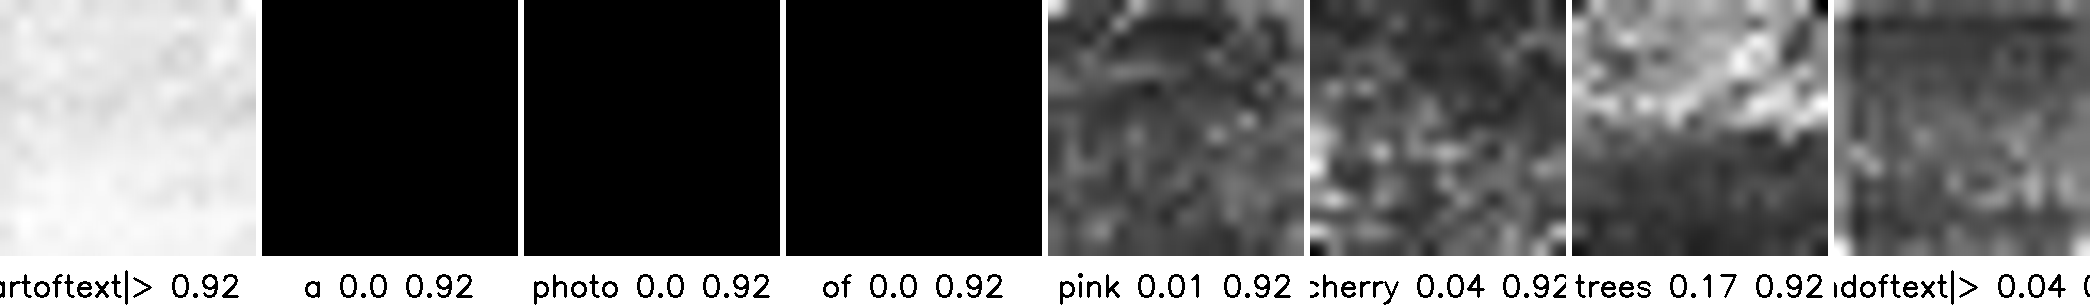

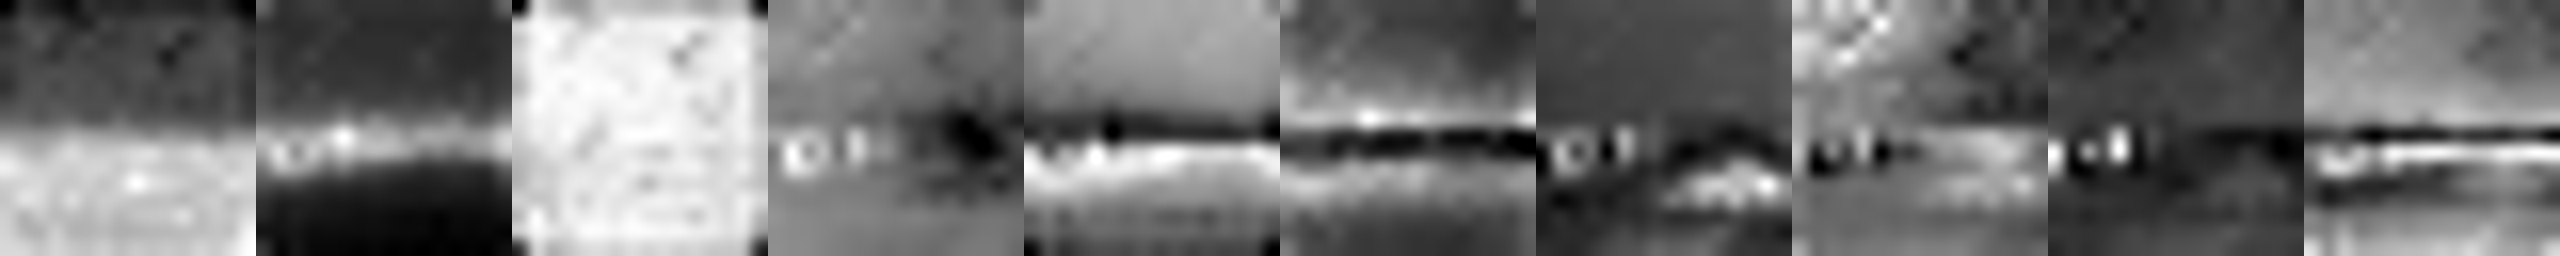

In [6]:
g_cpu = torch.Generator().manual_seed(47)
prompts = ["a photo of pink cherry trees"]
equalizer = get_equalizer(ldm_stable, prompts[0], ("person"), (0.5,))
controller = AttentionStore(equalizer=equalizer)
image, x_t = run_and_display(ldm_stable, prompts, controller, latent=None, run_baseline=False, generator=g_cpu)
show_cross_attention(ldm_stable, prompts, controller, res=16, from_where=("up", "down"))
show_self_attention_comp(prompts, controller, res=16, from_where=("up", "down"))

  0%|          | 0/51 [00:00<?, ?it/s]

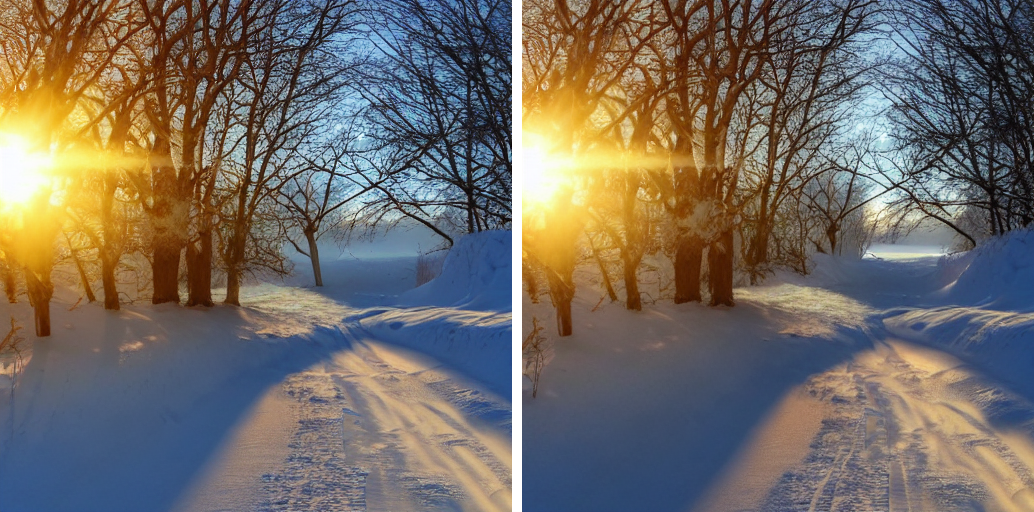

In [21]:
prompts = ["a photo of warm sunshine in winter",
           "a photo of warm sunshine in winter, a person"]
lb = LocalBlend(prompts, (("penguin", "penguin"),), ldm=ldm_stable)
controllera = AttentionRefine(prompts, NUM_DIFFUSION_STEPS, cross_replace_steps=0.8,
                             self_replace_steps=0.4,
                             local_blend=None, ldm=ldm_stable)
equalizer = get_equalizer(ldm_stable, prompts[1], ("person"), (3,))
controller = AttentionReweight(prompts, NUM_DIFFUSION_STEPS, cross_replace_steps=0.8,
                               self_replace_steps=.4, equalizer=equalizer, local_blend=None,
                               controller=controllera, ldm=ldm_stable)
_ = run_and_display(ldm_stable, prompts, controller, latent=x_t, run_baseline=False)